In [1]:
import numpy as np
import os
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Input, Embedding
import tensorflow_addons as tfa
from tensorflow_addons.seq2seq import AttentionWrapper


In [3]:
stop_words = set(stopwords.words('english'))

def split_data(lines):
    for i in range(len(lines)):
        if lines[i][0] == '\n':
            summary = lines[:i]
            lines = lines[i:]
            return summary, lines

def split_string(lines):
    sent_tokens = []
    for line in lines:
        line = re.sub("\n", "", line)
        for sent in sent_tokenize(line):
            sent_tokens.append(sent)
    return sent_tokens

def split_summary(lines):
    sent_tokens = ["_START_"]
    for line in lines:
        line = re.sub("\n", "", line)
        #line = " ".join(["_START_", line, "_END_"])
        for sent in sent_tokenize(line):
            sent_tokens.append(sent)
    sent_tokens.append("_END_")
    return sent_tokens

def clean(string):
    word_tokens = word_tokenize(string)
    filtered_sentence = [w for w in word_tokens if (not w in stop_words) and (len(w)>3)]
    return filtered_sentence 

In [7]:
text_overall, summary_overall  = [], []
text_count, summary_count = [], []

directory = '../data'
for filename in os.listdir(directory):
    with open('../data/'+filename) as f:
        lines = f.readlines()
        f.close()

        summary, lines = split_data(lines)
        summary, lines = split_summary(summary), split_string(lines)

        clean_text = []
        tex_count = 0
        for line in lines:
            temp = clean(line)
            if temp != []:
                tex_count += (len(temp))
                for t in temp:
                    clean_text.append(t)  
        text_overall.append(clean_text)
        text_count.append(tex_count)

        clean_summary = []
        sum_count = 0
        for line in summary:
            temp = clean(line)
            if temp != []:
                sum_count+= (len(temp))
                for t in temp:
                    clean_summary.append(t)
        summary_overall.append(clean_summary)
        summary_count.append(sum_count)

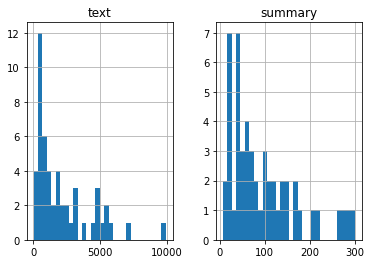

In [8]:
overview = pd.DataFrame({'text':text_count, 'summary':summary_count})
overview.hist(bins=30)
plt.show()

In this notebook we build up the Encoder-Decoder architecture using LSTM model. 

In [9]:
max_len = 200
x_num_words = 200
y_num_words = 40
hidden_size = 100


encoder_input = Input(shape=(max_len, ))
enc_emb = Embedding(input_dim=x_num_words, output_dim=100)(encoder_input)

encoder = LSTM(hidden_size, return_sequences=True, return_state=True)
encoder_output, state_h, state_c = encoder(enc_emb)

decoder_input = Input(shape=(None, ))
dec_emb = Embedding(input_dim = y_num_words, output_dim=)(decoder_input)

decoder = LSTM(hidden_size, return_sequences=True, return_state=True)
decoder_output, state_h, state_c = decoder(dec_emb, initial_state=[state_h, state_c])

attention = AttentionWrapper()

model = Model()

TypeError: __init__() missing 1 required positional argument: 'output_dim'